## Observations and Insights

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

In [5]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata_df, study_results_df)
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# rename columns to make the rest of this project easier
clean_df= complete_df.rename(columns={"Mouse ID": "mouse_id", "Drug Regimen":"drug_regimen",
                                       "Sex":"sex", "Age_months":"age_months", "Weight (g)":"weight_g",
                                       "Timepoint":"timepoint", "Tumor Volume (mm3)":"tumor_volume",
                                       "Metastatic Sites":"metastatic_sites"})
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [7]:
count_drug = clean_df['drug_regimen'].value_counts()
count_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: drug_regimen, dtype: int64

In [ ]:
capomulin_tumorvol = count_drug['capomulin'].mean()
ramicane_tumorvol =
ketapril_tumorvol =
naftisol_tumorvol =
zoniferol_tumorvol =
placebo_tumorvol =
stelasyn_tumorvol =
ceftamin_tumorvol =
infubinol_tumorvol =
propriva_tumorvol =

In [8]:
filter_df = clean_df.filter(regex=('drug_regimen|tumor_volume'),axis=1)
filter_df.head()

,drug_regimen,tumor_volume
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [9]:
filter_df.describe()

,tumor_volume
count,1893.000000
mean,50.448381
std,8.894722
min,22.050126
25%,45.000000
50%,48.951474
75%,56.292200
max,78.567014


In [46]:
drug_stats = clean_df.groupby(['drug_regimen','tumor_volume']).describe()
drug_stats

age_months                                          \
                               count  mean std   min   25%   50%   75%   max   
drug_regimen tumor_volume                                                      
Capomulin    23.343598           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             25.472143           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             28.167397           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             28.328531           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             28.430964           1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
             28.484033           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             30.206825           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             30.485985           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             30.834357           1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
             31.023923           1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   
             31.378045           1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
             31.475411           1.0  17.0 NaN  17.0  17.0  17.0  17.0  17.0   
             31.758275           1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
             31.804841           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             31.896238           1.0  17.0 NaN  17.0  17.0  17.0  17.0  17.0   
             32.377357           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             32.562839           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             32.623003           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             32.680655           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             32.868916           1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0   
             32.915292           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             32.947615           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             32.959671           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             33.069337           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             33.118756           1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
             33.329098           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
             33.515671           1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0   
             33.893345           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             33.949341           1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0   
             33.949940           1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
...                              ...   ...  ..   ...   ...   ...   ...   ...   
Zoniferol    60.861844           1.0  19.0 NaN  19.0  19.0  19.0  19.0  19.0   
             61.074795           1.0  11.0 NaN  11.0  11.0  11.0  11.0  11.0   
             61.380249           1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   
             61.768605           1.0   8.0 NaN   8.0   8.0   8.0   8.0   8.0   
             61.840058           1.0  19.0 NaN  19.0  19.0  19.0  19.0  19.0   
             62.109651           1.0  14.0 NaN  14.0  14.0  14.0  14.0  14.0   
             62.221915           1.0  14.0 NaN  14.0  14.0  14.0  14.0  14.0   
             62.236572           1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0   
             62.327171           1.0  24.0 NaN  24.0  24.0  24.0  24.0  24.0   
             62.327966           1.0  15.0 NaN  15.0  15.0  15.0  15.0  15.0   
             63.125659           1.0  12.0 NaN  12.0  12.0  12.0  12.0  12.0   
             63.194428           1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0   
             63.281071           1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0   
             63.488697           1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   
             63.686445           1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
             64.294085           1.0  24.0 NaN  24.0  24.0  24.0  24.0  24.0   
             64.575222    

In [ ]:
clean_df.mean(axis = 1)[0:5]

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df['tumor_volume'].describe()



count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: tumor_volume, dtype: float64

## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas



In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

count_regimen = clean_df['drug_regimen'].value_counts()
count_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: drug_regimen, dtype: int64

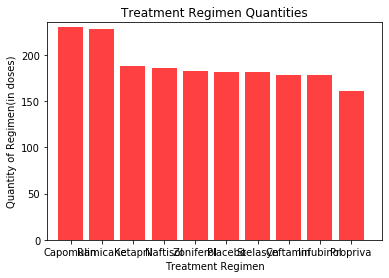

In [17]:
x_axis = np.arange(0, len(count_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.title("Treatment Regimen Quantities")
plt.xlabel("Treatment Regimen")
plt.ylabel("Quantity of Regimen(in doses)")

plt.xlim(-0.75, len(count_regimen)-0.0075)
plt.ylim(0, max(count_regimen) + 5)

plt.bar(x_axis, count_regimen, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol",
          "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"])

# plt.xticks(tick_locations, ["Capomulin"],["Ramicane"],["Ketapril"],["Naftisol"],["Zoniferol"],
          # ["Placebo"],["Stelasyn"],["Ceftamin"],["Infubinol"],["Propriva"])

plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 



In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

